Mario Romero y Florencia Vargas

## Archivos y montar dirve

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
## import
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns


### Rutas Mario

In [129]:
# # Ruta del archivo en tu Drive
path1 = "/content/drive/MyDrive/batchs/batch_t1.parquet"
path2 = "/content/drive/MyDrive/batchs/batch_t2.parquet"
path3 = "/content/drive/MyDrive/batchs/batch_t3.parquet"
path4 = "/content/drive/MyDrive/batchs/batch_t4.parquet"
# Leer el archivo parquet
df1 = pd.read_parquet(path1)
df2 = pd.read_parquet(path2)
df3 = pd.read_parquet(path3)
df4 = pd.read_parquet(path4)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/batchs/batch_t1.parquet'

### Rutas Flo

In [130]:
# # Ruta del archivo en tu Drive
path1 = "/content/drive/MyDrive/batch_t1.parquet"
path2 = "/content/drive/MyDrive/batch_t2.parquet"
path3 = "/content/drive/MyDrive/batch_t3.parquet"
path4 = "/content/drive/MyDrive/batch_t4.parquet"
# Leer el archivo parquet
df1 = pd.read_parquet(path1)
df2 = pd.read_parquet(path2)
df3 = pd.read_parquet(path3)
df4 = pd.read_parquet(path4)

In [131]:
#Predicciones
f1= "/content/drive/MyDrive/fase1.csv"
f2= "/content/drive/MyDrive/fase2.csv"
f3= "/content/drive/MyDrive/fase3.csv"
f4= "/content/drive/MyDrive/fase4.csv"
# Leer el archivo parquet
fase1 = pd.read_csv(f1)
fase2 = pd.read_csv(f2)
fase3 = pd.read_csv(f3)
fase4 = pd.read_csv(f4)

In [132]:
!pip install mlflow


In [133]:
!pip install optuna
!pip install mlflow xgboost


In [134]:
%cd /content/drive/MyDrive/EntregaFinal/airflow/scripts
!python train_model.py


/content/drive/MyDrive/Entrega Final/airflow/scripts


## 📌 Informe: Performance del modelo [6.0 puntos]

En esta sección se espera que el equipo analice de manera retrospectiva el performance de su modelo y saque conclusiones en función de sus resultados.

Para esto, tendrán que incurrir en 3 tipos de análisis:

- **Individual:** Deben evaluar el performance de su modelo tomando cada semana de forma aislada.

- **Comparativo:** Deben evaluar el performance de su modelo *a través* de las semanas, comparando el desempeño entre las semanas e identificando posibles tendencias.
    - Para esta parte se espera que generen gráficos de tendencia y tablas comparativas para apoyar su análisis.

- **Conclusiones y Aprendizajes:** Deben escribir sus principales conclusiones y aprendizajes de este proyecto.

A lo largo de esta sección, se espera que respondan preguntas como:

1. ¿Cómo variaron sus métricas a lo largo de los distintos conjuntos de datos?
2. ¿En qué momento el modelo tuvo su peor desempeño y por qué?
3. ¿Detectaron algún cambio significativo (drift) en la distribución de los datos? ¿Cómo lo identificaron?  
4. ¿Tuvieron que reentrenar su modelo con los nuevos datos? ¿Porqué? ¿Ayudó esto al performance de su modelo?
4. ¿Qué decisión técnica (modelo, métrica, imputación, etc.) tuvo más impacto en los resultados?  
5. ¿Qué hiperparámetro fue el más importante para su modelo?
5. ¿Qué variable fue más influyente en las predicciones? ¿Cómo lo interpretan? ¿Cómo cambió su importancia con respecto a las otras variables a lo largo de los batch de datos?
6. ¿Qué aprendieron sobre el negocio a partir de los resultados del modelo?
7. ¿Qué limitaciones detectaron en su modelo o en los datos?  

**IMPORTANTE: Se espera que en sus respuestas hagan referencia a los artefactos (métricas, hiperparámetros, gráficos de interpretabilidad, etc) que su pipeline genera.**


# [0]  Paso previo: Exploración nuevos datos






In [135]:
print(df1.head())

   customer_id  product_id  order_id purchase_date     items
0       245976        1304   1261032    2025-01-05  1.000000
1       245976        1372   1261032    2025-01-05  1.000000
2       245976        1370   1261032    2025-01-05  1.666667
3       245976       11262   1261032    2025-01-05  1.666667
4       214968       56714   1260723    2025-01-05  1.666667


### distribuciones

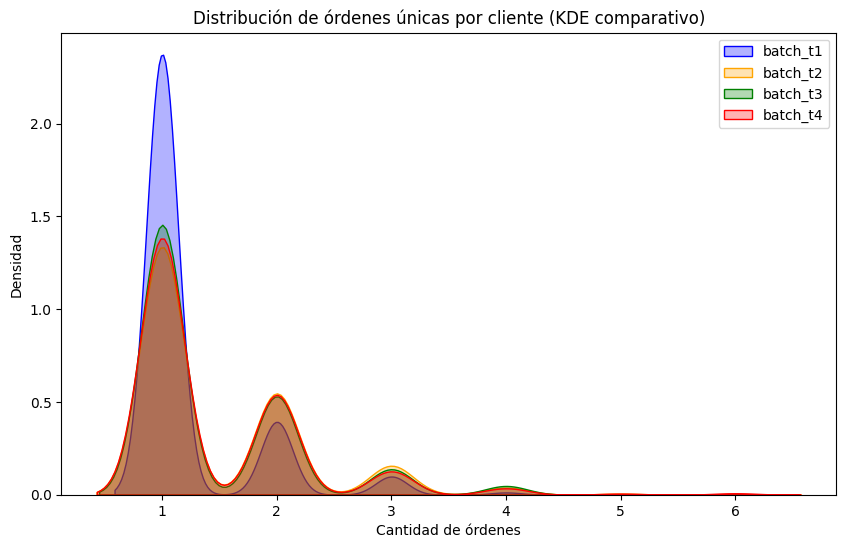

In [136]:

dfs = [df1, df2, df3, df4]
labels = ["batch_t1", "batch_t2", "batch_t3", "batch_t4"]
colors = ["blue", "orange", "green", "red"]

plt.figure(figsize=(10,6))

for df, label, color in zip(dfs, labels, colors):
    orders_per_client = df.groupby("customer_id")["order_id"].nunique()

    sns.kdeplot(
        orders_per_client,
        label=label,
        color=color,
        fill=True,
        alpha=0.3
    )

plt.title("Distribución de órdenes únicas por cliente (KDE comparativo)")
plt.xlabel("Cantidad de órdenes")
plt.ylabel("Densidad")
plt.legend()
plt.show()


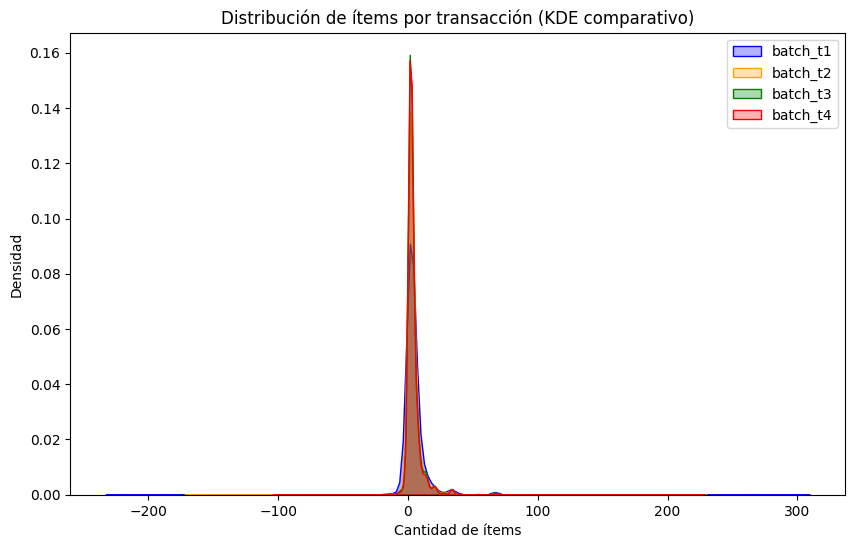

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

dfs = [df1, df2, df3, df4]
labels = ["batch_t1", "batch_t2", "batch_t3", "batch_t4"]
colors = ["blue", "orange", "green", "red"]

plt.figure(figsize=(10,6))

for df, label, color in zip(dfs, labels, colors):
    sns.kdeplot(df["items"], label=label, color=color, fill=True, alpha=0.3)

plt.title("Distribución de ítems por transacción (KDE comparativo)")
plt.xlabel("Cantidad de ítems")
plt.ylabel("Densidad")
plt.legend()
plt.show()


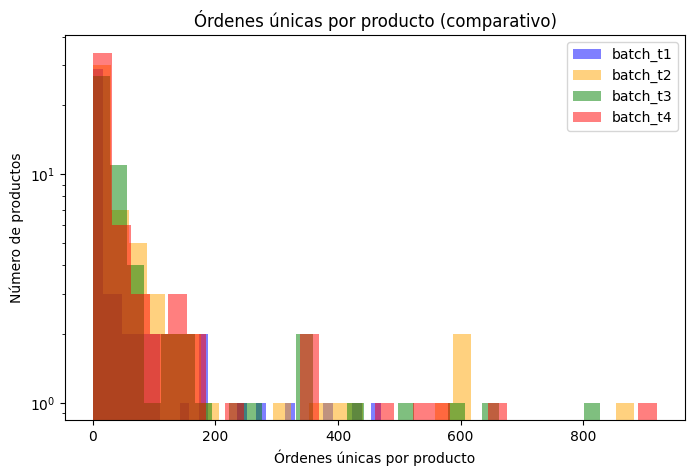

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

for df, label, color in zip(dfs, labels, colors):
    orders_per_product = df.groupby("product_id")["order_id"].nunique()

    plt.hist(
        orders_per_product,
        bins=30,
        alpha=0.5,
        label=label,
        color=color
    )

plt.yscale("log")  # opcional para escalas muy distintas
plt.title("Órdenes únicas por producto (comparativo)")
plt.xlabel("Órdenes únicas por producto")
plt.ylabel("Número de productos")
plt.legend()
plt.show()


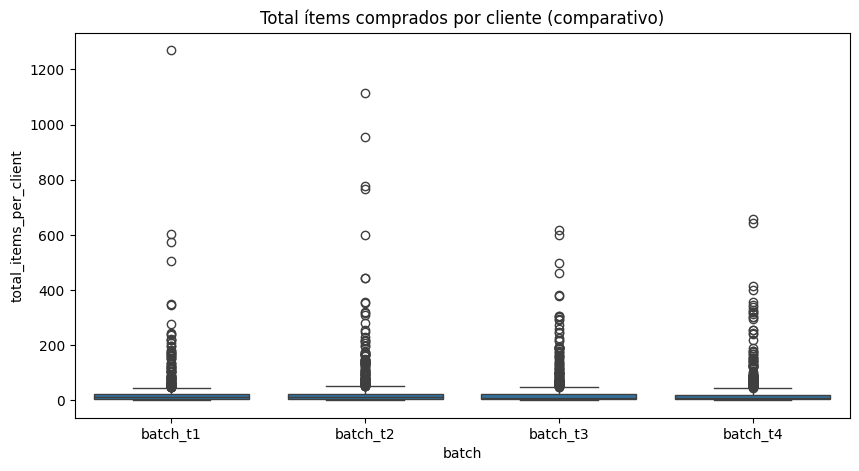

In [139]:
import seaborn as sns
import pandas as pd

data_plot = []

for df, label in zip(dfs, labels):
    items_per_customer = df.groupby("customer_id")["items"].sum()
    for val in items_per_customer:
        data_plot.append({"batch": label, "total_items_per_client": val})

df_plot = pd.DataFrame(data_plot)

plt.figure(figsize=(10,5))
sns.boxplot(x="batch", y="total_items_per_client", data=df_plot)
plt.title("Total ítems comprados por cliente (comparativo)")
plt.show()


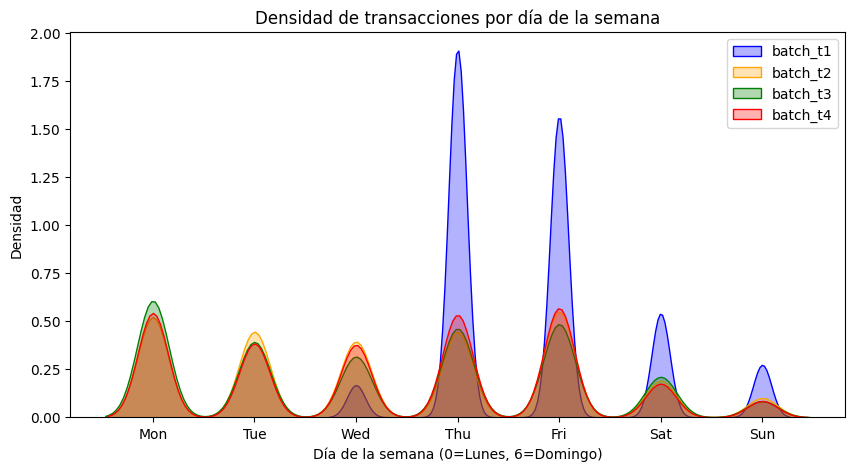

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Mapear días a números
day_mapping = {
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6
}

plt.figure(figsize=(10,5))

for df, label, color in zip(dfs, labels, colors):
    df["purchase_date"] = pd.to_datetime(df["purchase_date"])
    df["day_of_week"] = df["purchase_date"].dt.day_name()
    df["day_of_week_num"] = df["day_of_week"].map(day_mapping)

    sns.kdeplot(
        df["day_of_week_num"],
        label=label,
        color=color,
        fill=True,
        bw_adjust=0.5,
        alpha=0.3,
    )

plt.title("Densidad de transacciones por día de la semana")
plt.xlabel("Día de la semana (0=Lunes, 6=Domingo)")
plt.ylabel("Densidad")
plt.xticks(
    ticks=range(7),
    labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
)
plt.legend()
plt.show()



### tendencia

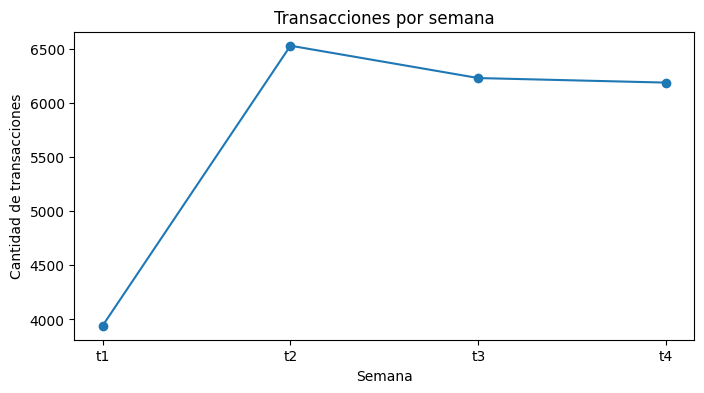

In [141]:
import matplotlib.pyplot as plt

n_trans = [len(df) for df in [df1, df2, df3, df4]]

plt.figure(figsize=(8,4))
plt.plot(["t1", "t2", "t3", "t4"], n_trans, marker='o')
plt.title("Transacciones por semana")
plt.xlabel("Semana")
plt.ylabel("Cantidad de transacciones")
plt.show()


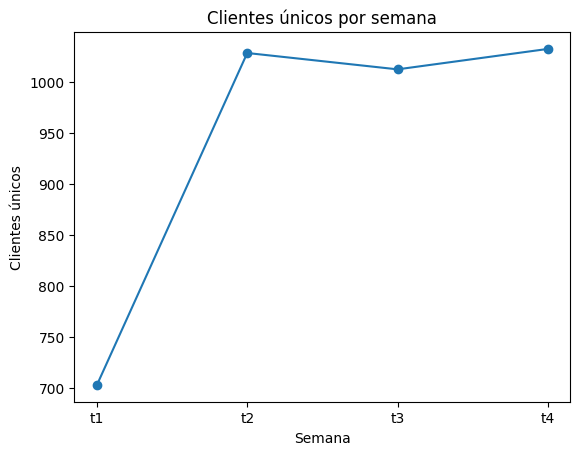

In [142]:
n_clients = [df["customer_id"].nunique() for df in [df1, df2, df3, df4]]

plt.plot(["t1", "t2", "t3", "t4"], n_clients, marker='o')
plt.title("Clientes únicos por semana")
plt.xlabel("Semana")
plt.ylabel("Clientes únicos")
plt.show()


In [143]:
for i, df in enumerate([df1, df2, df3, df4], 1):
    top = df["product_id"].value_counts().head(5)
    print(f"Top productos en t{i}:\n{top}\n")


Top productos en t1:
product_id
1370     505
56714    457
11262    431
1304     348
57414    286
Name: count, dtype: int64

Top productos en t2:
product_id
1370     910
11262    676
1304     608
56714    583
63510    440
Name: count, dtype: int64

Top productos en t3:
product_id
1370     858
11262    716
1304     619
56714    541
57414    433
Name: count, dtype: int64

Top productos en t4:
product_id
1370     953
11262    705
1304     596
56714    562
57414    500
Name: count, dtype: int64



# [1] Analisis Individual

##Semana 1

SEMANA 1 (ID=81b7be42185a4caf90f8f71cc935c02b)
max_depth=8, n_estimators=227
MAE=25949.907 | RMSE=33538.594 | MAPE=912.16% | R²=-0.865 | Fit=Underfitting
Aciertos=2389 | Errores=29921 | Accuracy=0.074


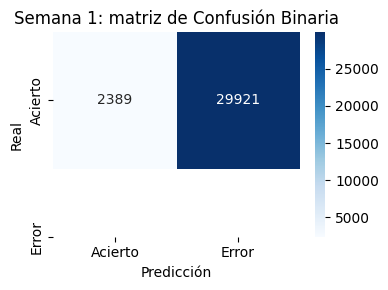

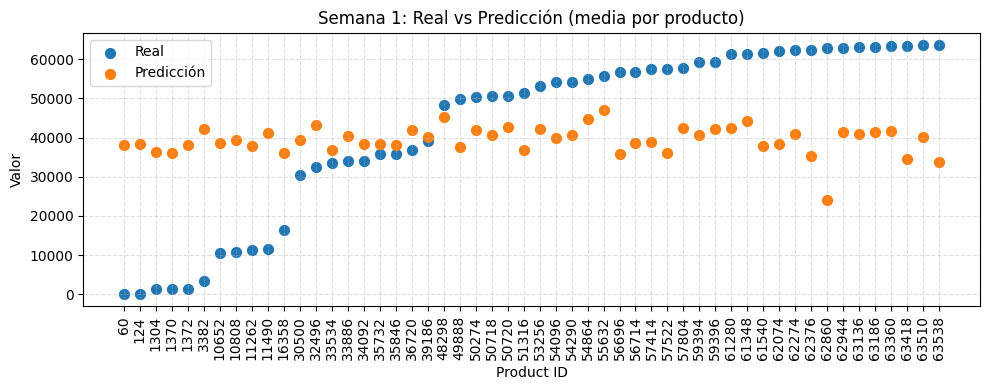

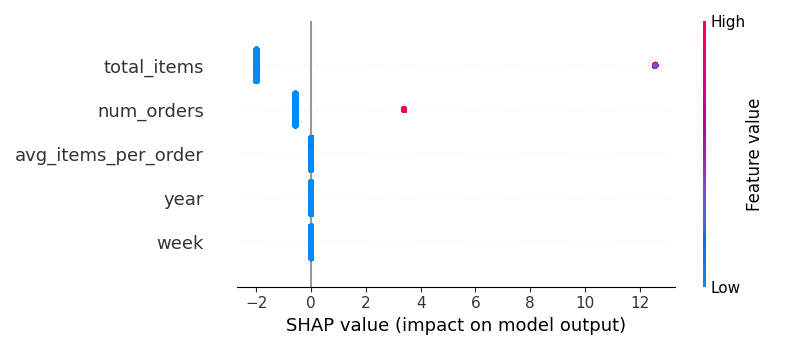

Top 10 Feature Importances (gain):
total_items    1575.035889
num_orders      726.857178


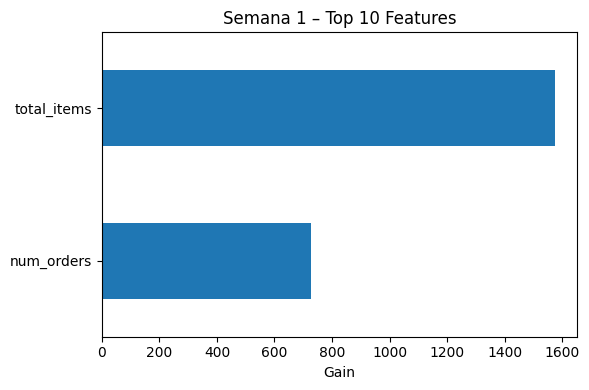

 Estadísticas de Residuales (pred-real)
          Mean resid:  5003.606
        Median resid:  610.000
           Std resid:  33163.765
   25% quantil resid: -14988.000
   50% quantil resid:  610.000
   75% quantil resid:  29130.000
   90% quantil resid:  55342.000
        % ≤ 5% error:  0.169
        % ≤10% error:  0.245
 Diagnóstico de Fit
std(y_true)       = 24561.844
std(residuals)    = 33163.765
ratio resid/y_true  = 1.350
Diagnóstico final : Subajuste severo



In [144]:
import os
import xgboost as xgb
from IPython.display import Image, display
import numpy as np
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score
)

run_id      = '81b7be42185a4caf90f8f71cc935c02b'
BASE = "/content/drive/MyDrive/EntregaFinal/airflow/mlruns/1"
max_depth   = 8
n_estimators= 227


df_true1 = (
    df1
      [['customer_id','product_id']]
      .rename(columns={'product_id':'y_true1'})
)
df_pred1 = (
    fase1
      [['customer_id','product_id']]
      .rename(columns={'product_id':'y_pred1'})
)

merged = pd.merge(df_true1, df_pred1, on='customer_id', how='inner')
y_true1, y_pred1 = merged['y_true1'], merged['y_pred1']

#Mtericas
mae   = mean_absolute_error(y_true1, y_pred1)
rmse  = np.sqrt(mean_squared_error(y_true1, y_pred1))
mape  = (np.abs((y_true1 - y_pred1) / y_true1)
           .replace([np.inf, -np.inf], np.nan)
           .dropna()
           .mean() * 100)
r2    = r2_score(y_true1, y_pred1)
std   = y_true1.std()
if r2 < 0.5:
    fit = "Underfitting"
elif rmse < std * 0.1:
    fit = "Overfitting"
else:
    fit = "Balanceado"

acc     = accuracy_score(y_true1, y_pred1)
correct = (y_true1 == y_pred1).sum()
errors  = len(y_true1) - correct


print(f"SEMANA 1 (ID={run_id})")
print(f"max_depth={max_depth}, n_estimators={n_estimators}")
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | MAPE={mape:.2f}% | R²={r2:.3f} | Fit={fit}")
print(f"Aciertos={correct} | Errores={errors} | Accuracy={acc:.3f}")


cm = np.array([[correct, errors]])

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Acierto','Error'],
            yticklabels=['Acierto','Error'])
plt.title("Semana 1: matriz de Confusión Binaria")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()



#Grafico de real vs prediccion
def plot_week(semana, df_real, df_pred):
    merged = (
        df_real[['customer_id','product_id']]
           .rename(columns={'product_id':'y_true'})
           .merge(
              df_pred.rename(columns={'product_id':'y_pred'})[['customer_id','y_pred']],
              on='customer_id'
           )
    )
    grouped = (
        merged
        .groupby('y_true')['y_pred']
        .mean()
        .reset_index(name='mean_pred')
        .sort_values('y_true')
    )

    x = np.arange(len(grouped))

    plt.figure(figsize=(10,4))
    plt.scatter(x, grouped['y_true'],    color='tab:blue',  label='Real',      s=50)
    plt.scatter(x, grouped['mean_pred'], color='tab:orange',label='Predicción',s=50)

    plt.xticks(x, grouped['y_true'], rotation=90)
    plt.title(f"Semana {semana}: Real vs Predicción (media por producto)")
    plt.xlabel("Product ID")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


plot_week(1, df1, fase1)

run_dir = os.path.join(BASE, run_id)

#shap
shap_path = None
for root, _, files in os.walk(run_dir):
    if "shap_summary.png" in files:
        shap_path = os.path.join(root, "shap_summary.png")
        break

if shap_path:
    display(Image(filename=shap_path))
else:
    print("shap_summary.png no encontrado")


#Importancias
model_file = None
for root, _, files in os.walk(run_dir):
    for f in files:
        name, ext = os.path.splitext(f)
        if name.startswith("model") and ext.lstrip(".") in ("xgb","bin","json"):
            model_file = os.path.join(root, f)
            break
    if model_file:
        break

if not model_file:
    print("model.xgb no encontrado")
else:
    booster = xgb.Booster()
    booster.load_model(model_file)
    gains = booster.get_score(importance_type="gain")
    fi    = pd.Series(gains).sort_values(ascending=False)

    top10 = fi.head(10)
    print("Top 10 Feature Importances (gain):")
    print(top10.to_string())

    plt.figure(figsize=(6,4))
    top10[::-1].plot.barh(color="tab:blue")
    plt.title("Semana 1 – Top 10 Features")
    plt.xlabel("Gain")
    plt.tight_layout()
    plt.show()



residuals    = y_pred1 - y_true1
rel_errors   = np.abs(residuals / np.where(y_true1==0, 1, y_true1)) * 100  # en %


stats = {
    'Mean resid'       : residuals.mean(),
    'Median resid'     : np.median(residuals),
    'Std resid'        : residuals.std(),
    '25% quantil resid': np.quantile(residuals, 0.25),
    '50% quantil resid': np.quantile(residuals, 0.50),
    '75% quantil resid': np.quantile(residuals, 0.75),
    '90% quantil resid': np.quantile(residuals, 0.90),
    '% ≤ 5% error'     : np.mean(rel_errors <= 5),
    '% ≤10% error'     : np.mean(rel_errors <=10),
}

print(" Estadísticas de Residuales (pred-real)")
for name, val in stats.items():
    print(f"{name:>20}: {val: .3f}")


std_y   = np.std(y_true1)
std_res = stats['Std resid']
ratio   = std_res / std_y

print(" Diagnóstico de Fit")
print(f"std(y_true)       = {std_y:.3f}")
print(f"std(residuals)    = {std_res:.3f}")
print(f"ratio resid/y_true  = {ratio:.3f}")

if r2 >= 0.8 and ratio <= 0.2:
    msg = "Excelente ajuste"
elif ratio < 0.1:
    msg = "Sobreajuste severo"
elif ratio < 0.2:
    msg = "Sobreajuste moderado"
elif r2 < 0.3:
    msg = "Subajuste severo"
elif ratio > 0.8:
    msg = "Subajuste moderado"
else:
    msg = "Ajuste balanceado"
print(f"Diagnóstico final : {msg}\n")


##Semana 2

SEMANA 2 (ID=4d40617a53e54e3fbda4d73aa0079034)
max_depth=8, n_estimators=227
MAE=25624.826 | RMSE=33431.853 | MAPE=881.68% | R²=-0.814 | Fit=Underfitting
Aciertos=2764 | Errores=25684 | Accuracy=0.097


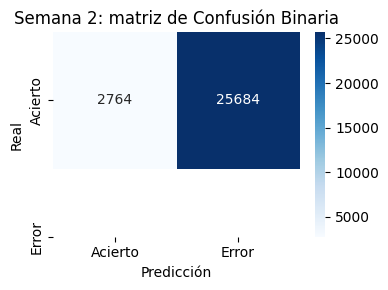

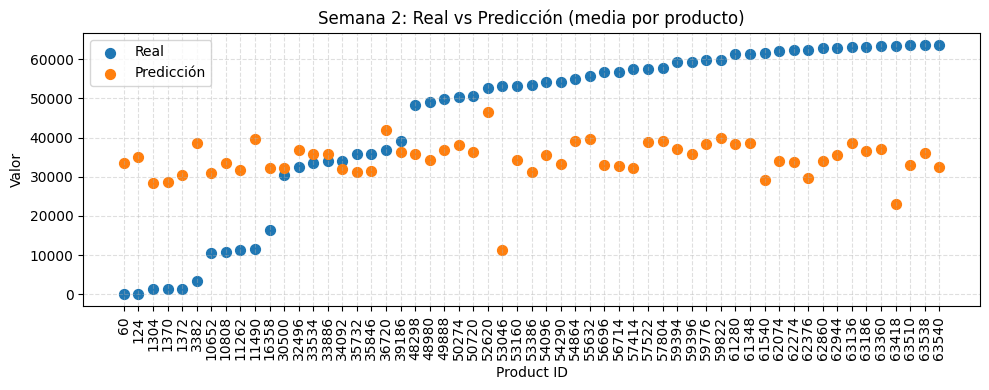

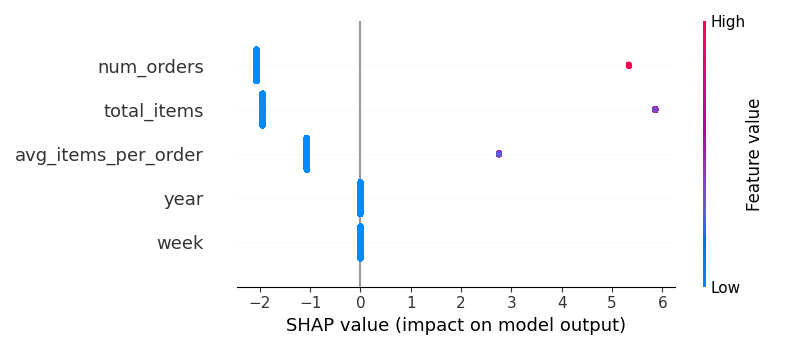

Top 10 Feature Importances (gain):
total_items            3357.052002
num_orders             1971.937012
avg_items_per_order     947.896057


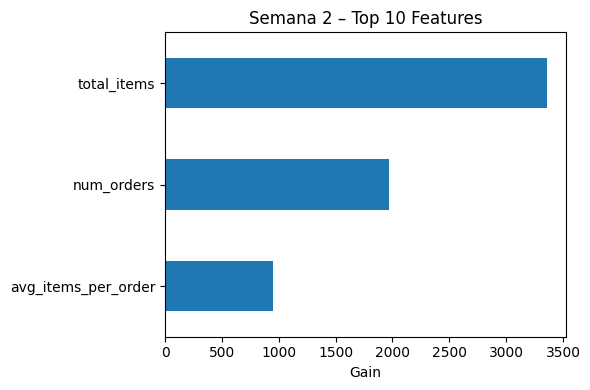

 Estadísticas de Residuales (pred-real)
          Mean resid: -1747.496
        Median resid:  0.000
           Std resid:  33386.738
   25% quantil resid: -26214.000
   50% quantil resid:  0.000
   75% quantil resid:  20868.000
   90% quantil resid:  51682.000
        % ≤ 5% error:  0.184
        % ≤10% error:  0.265
 Diagnóstico de Fit
std(y_true)       = 24820.340
std(residuals)    = 33386.738
ratio resid/y_true  = 1.345
Diagnóstico final : Subajuste severo



In [145]:
import os
import xgboost as xgb
from IPython.display import Image, display
import numpy as np
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score
)

run_id      = '4d40617a53e54e3fbda4d73aa0079034'
BASE = "/content/drive/MyDrive/EntregaFinal/airflow/mlruns/1"
max_depth   = 8
n_estimators= 227


df_true2 = (
    df2
      [['customer_id','product_id']]
      .rename(columns={'product_id':'y_true2'})
)
df_pred2 = (
    fase2
      [['customer_id','product_id']]
      .rename(columns={'product_id':'y_pred2'})
)

merged = pd.merge(df_true2, df_pred2, on='customer_id', how='inner')
y_true2, y_pred2 = merged['y_true2'], merged['y_pred2']

#Mtericas
mae   = mean_absolute_error(y_true2, y_pred2)
rmse  = np.sqrt(mean_squared_error(y_true2, y_pred2))
mape  = (np.abs((y_true2 - y_pred2) / y_true2)
           .replace([np.inf, -np.inf], np.nan)
           .dropna()
           .mean() * 100)
r2    = r2_score(y_true2, y_pred2)
std   = y_true2.std()
if r2 < 0.5:
    fit = "Underfitting"
elif rmse < std * 0.1:
    fit = "Overfitting"
else:
    fit = "Balanceado"

acc     = accuracy_score(y_true2, y_pred2)
correct = (y_true2 == y_pred2).sum()
errors  = len(y_true2) - correct


print(f"SEMANA 2 (ID={run_id})")
print(f"max_depth={max_depth}, n_estimators={n_estimators}")
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | MAPE={mape:.2f}% | R²={r2:.3f} | Fit={fit}")
print(f"Aciertos={correct} | Errores={errors} | Accuracy={acc:.3f}")


cm = np.array([[correct, errors]])

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Acierto','Error'],
            yticklabels=['Acierto','Error'])
plt.title("Semana 2: matriz de Confusión Binaria")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()



#Grafico de real vs prediccion
def plot_week(semana, df_real, df_pred):
    merged = (
        df_real[['customer_id','product_id']]
           .rename(columns={'product_id':'y_true'})
           .merge(
              df_pred.rename(columns={'product_id':'y_pred'})[['customer_id','y_pred']],
              on='customer_id'
           )
    )
    grouped = (
        merged
        .groupby('y_true')['y_pred']
        .mean()
        .reset_index(name='mean_pred')
        .sort_values('y_true')
    )

    x = np.arange(len(grouped))

    plt.figure(figsize=(10,4))
    plt.scatter(x, grouped['y_true'],    color='tab:blue',  label='Real',      s=50)
    plt.scatter(x, grouped['mean_pred'], color='tab:orange',label='Predicción',s=50)

    plt.xticks(x, grouped['y_true'], rotation=90)
    plt.title(f"Semana {semana}: Real vs Predicción (media por producto)")
    plt.xlabel("Product ID")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


plot_week(2, df2, fase2)

run_dir = os.path.join(BASE, run_id)

#shap
shap_path = None
for root, _, files in os.walk(run_dir):
    if "shap_summary.png" in files:
        shap_path = os.path.join(root, "shap_summary.png")
        break

if shap_path:
    display(Image(filename=shap_path))
else:
    print("shap_summary.png no encontrado")


#Importancias
model_file = None
for root, _, files in os.walk(run_dir):
    for f in files:
        name, ext = os.path.splitext(f)
        if name.startswith("model") and ext.lstrip(".") in ("xgb","bin","json"):
            model_file = os.path.join(root, f)
            break
    if model_file:
        break

if not model_file:
    print("model.xgb no encontrado")
else:
    booster = xgb.Booster()
    booster.load_model(model_file)
    gains = booster.get_score(importance_type="gain")
    fi    = pd.Series(gains).sort_values(ascending=False)

    top10 = fi.head(10)
    print("Top 10 Feature Importances (gain):")
    print(top10.to_string())

    plt.figure(figsize=(6,4))
    top10[::-1].plot.barh(color="tab:blue")
    plt.title("Semana 2 – Top 10 Features")
    plt.xlabel("Gain")
    plt.tight_layout()
    plt.show()



residuals    = y_pred2 - y_true2
rel_errors   = np.abs(residuals / np.where(y_true2==0, 1, y_true2)) * 100  # en %


stats = {
    'Mean resid'       : residuals.mean(),
    'Median resid'     : np.median(residuals),
    'Std resid'        : residuals.std(),
    '25% quantil resid': np.quantile(residuals, 0.25),
    '50% quantil resid': np.quantile(residuals, 0.50),
    '75% quantil resid': np.quantile(residuals, 0.75),
    '90% quantil resid': np.quantile(residuals, 0.90),
    '% ≤ 5% error'     : np.mean(rel_errors <= 5),
    '% ≤10% error'     : np.mean(rel_errors <=10),
}

print(" Estadísticas de Residuales (pred-real)")
for name, val in stats.items():
    print(f"{name:>20}: {val: .3f}")


std_y   = np.std(y_true2)
std_res = stats['Std resid']
ratio   = std_res / std_y

print(" Diagnóstico de Fit")
print(f"std(y_true)       = {std_y:.3f}")
print(f"std(residuals)    = {std_res:.3f}")
print(f"ratio resid/y_true  = {ratio:.3f}")

if r2 >= 0.8 and ratio <= 0.2:
    msg = "Excelente ajuste"
elif ratio < 0.1:
    msg = "Sobreajuste severo"
elif ratio < 0.2:
    msg = "Sobreajuste moderado"
elif r2 < 0.3:
    msg = "Subajuste severo"
elif ratio > 0.8:
    msg = "Subajuste moderado"
else:
    msg = "Ajuste balanceado"
print(f"Diagnóstico final : {msg}\n")


##Semana 3

SEMANA 3 (ID=55ef6e3d8cd440439907f978b8253e17)
max_depth=8, n_estimators=227
MAE=25598.220 | RMSE=33325.704 | MAPE=839.45% | R²=-0.835 | Fit=Underfitting
Aciertos=2528 | Errores=22425 | Accuracy=0.101


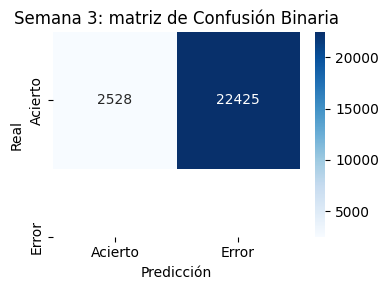

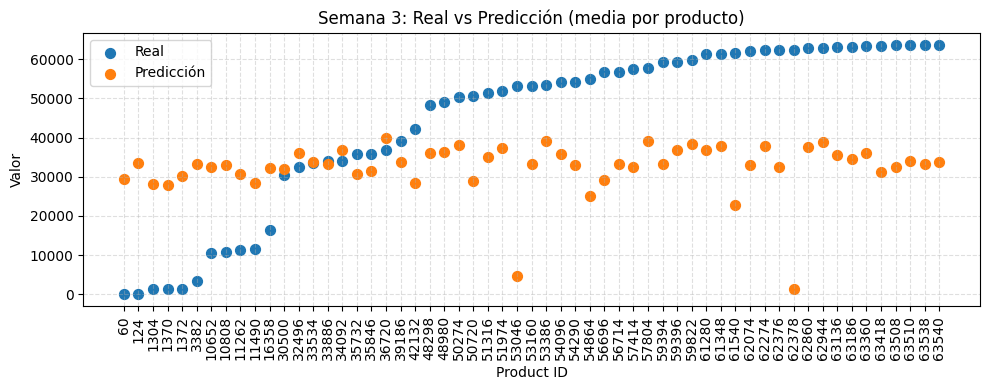

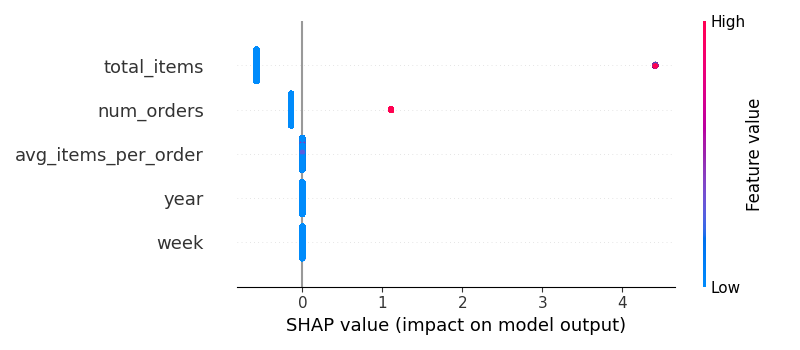

Top 10 Feature Importances (gain):
num_orders     9654.657227
total_items    8817.963867


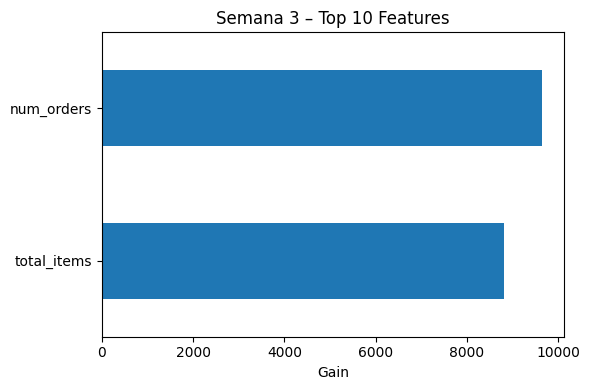

 Estadísticas de Residuales (pred-real)
          Mean resid: -872.950
        Median resid:  0.000
           Std resid:  33314.937
   25% quantil resid: -26196.000
   50% quantil resid:  0.000
   75% quantil resid:  22624.000
   90% quantil resid:  52098.000
        % ≤ 5% error:  0.187
        % ≤10% error:  0.263
 Diagnóstico de Fit
std(y_true)       = 24598.678
std(residuals)    = 33314.937
ratio resid/y_true  = 1.354
Diagnóstico final : Subajuste severo



In [160]:

import os
import xgboost as xgb
from IPython.display import Image, display
import numpy as np
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score
)

run_id      = '55ef6e3d8cd440439907f978b8253e17'
BASE = "/content/drive/MyDrive/EntregaFinal/airflow/mlruns/1"
max_depth   = 8
n_estimators= 227


df_true3 = (
    df3
      [['customer_id','product_id']]
      .rename(columns={'product_id':'y_true3'})
)
df_pred3 = (
    fase3
      [['customer_id','product_id']]
      .rename(columns={'product_id':'y_pred3'})
)

merged = pd.merge(df_true3, df_pred3, on='customer_id', how='inner')
y_true3, y_pred3 = merged['y_true3'], merged['y_pred3']

#Mtericas
mae   = mean_absolute_error(y_true3, y_pred3)
rmse  = np.sqrt(mean_squared_error(y_true3, y_pred3))
mape  = (np.abs((y_true3 - y_pred3) / y_true3)
           .replace([np.inf, -np.inf], np.nan)
           .dropna()
           .mean() * 100)
r2    = r2_score(y_true3, y_pred3)
std   = y_true3.std()
if r2 < 0.5:
    fit = "Underfitting"
elif rmse < std * 0.1:
    fit = "Overfitting"
else:
    fit = "Balanceado"

acc     = accuracy_score(y_true3, y_pred3)
correct = (y_true3 == y_pred3).sum()
errors  = len(y_true3) - correct


print(f"SEMANA 3 (ID={run_id})")
print(f"max_depth={max_depth}, n_estimators={n_estimators}")
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | MAPE={mape:.2f}% | R²={r2:.3f} | Fit={fit}")
print(f"Aciertos={correct} | Errores={errors} | Accuracy={acc:.3f}")


cm = np.array([[correct, errors]])

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Acierto','Error'],
            yticklabels=['Acierto','Error'])
plt.title("Semana 3: matriz de Confusión Binaria")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()



#Grafico de real vs prediccion
def plot_week(semana, df_real, df_pred):
    merged = (
        df_real[['customer_id','product_id']]
           .rename(columns={'product_id':'y_true'})
           .merge(
              df_pred.rename(columns={'product_id':'y_pred'})[['customer_id','y_pred']],
              on='customer_id'
           )
    )
    grouped = (
        merged
        .groupby('y_true')['y_pred']
        .mean()
        .reset_index(name='mean_pred')
        .sort_values('y_true')
    )

    x = np.arange(len(grouped))

    plt.figure(figsize=(10,4))
    plt.scatter(x, grouped['y_true'],    color='tab:blue',  label='Real',      s=50)
    plt.scatter(x, grouped['mean_pred'], color='tab:orange',label='Predicción',s=50)

    plt.xticks(x, grouped['y_true'], rotation=90)
    plt.title(f"Semana {semana}: Real vs Predicción (media por producto)")
    plt.xlabel("Product ID")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


plot_week(3, df3, fase3)

run_dir = os.path.join(BASE, run_id)

#shap
shap_path = None
for root, _, files in os.walk(run_dir):
    if "shap_summary.png" in files:
        shap_path = os.path.join(root, "shap_summary.png")
        break

if shap_path:
    display(Image(filename=shap_path))
else:
    print("shap_summary.png no encontrado")


#Importancias
model_file = None
for root, _, files in os.walk(run_dir):
    for f in files:
        name, ext = os.path.splitext(f)
        if name.startswith("model") and ext.lstrip(".") in ("xgb","bin","json"):
            model_file = os.path.join(root, f)
            break
    if model_file:
        break

if not model_file:
    print("model.xgb no encontrado")
else:
    booster = xgb.Booster()
    booster.load_model(model_file)
    gains = booster.get_score(importance_type="gain")
    fi    = pd.Series(gains).sort_values(ascending=False)

    top10 = fi.head(10)
    print("Top 10 Feature Importances (gain):")
    print(top10.to_string())

    plt.figure(figsize=(6,4))
    top10[::-1].plot.barh(color="tab:blue")
    plt.title("Semana 3 – Top 10 Features")
    plt.xlabel("Gain")
    plt.tight_layout()
    plt.show()



residuals    = y_pred3 - y_true3
rel_errors   = np.abs(residuals / np.where(y_true3==0, 1, y_true3)) * 100  # en %


stats = {
    'Mean resid'       : residuals.mean(),
    'Median resid'     : np.median(residuals),
    'Std resid'        : residuals.std(),
    '25% quantil resid': np.quantile(residuals, 0.25),
    '50% quantil resid': np.quantile(residuals, 0.50),
    '75% quantil resid': np.quantile(residuals, 0.75),
    '90% quantil resid': np.quantile(residuals, 0.90),
    '% ≤ 5% error'     : np.mean(rel_errors <= 5),
    '% ≤10% error'     : np.mean(rel_errors <=10),
}

print(" Estadísticas de Residuales (pred-real)")
for name, val in stats.items():
    print(f"{name:>20}: {val: .3f}")


std_y   = np.std(y_true3)
std_res = stats['Std resid']
ratio   = std_res / std_y

print(" Diagnóstico de Fit")
print(f"std(y_true)       = {std_y:.3f}")
print(f"std(residuals)    = {std_res:.3f}")
print(f"ratio resid/y_true  = {ratio:.3f}")

if r2 >= 0.8 and ratio <= 0.2:
    msg = "Excelente ajuste"
elif ratio < 0.1:
    msg = "Sobreajuste severo"
elif ratio < 0.2:
    msg = "Sobreajuste moderado"
elif r2 < 0.3:
    msg = "Subajuste severo"
elif ratio > 0.8:
    msg = "Subajuste moderado"
else:
    msg = "Ajuste balanceado"
print(f"Diagnóstico final : {msg}\n")

##Semana 4

SEMANA 4 (ID=03a9cc4cfed54ba6bb984dc5ea9e3b5e)
max_depth=8, n_estimators=227
MAE=25896.260 | RMSE=33730.706 | MAPE=831.14% | R²=-0.821 | Fit=Underfitting
Aciertos=2485 | Errores=22147 | Accuracy=0.101


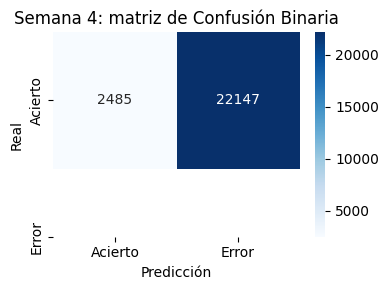

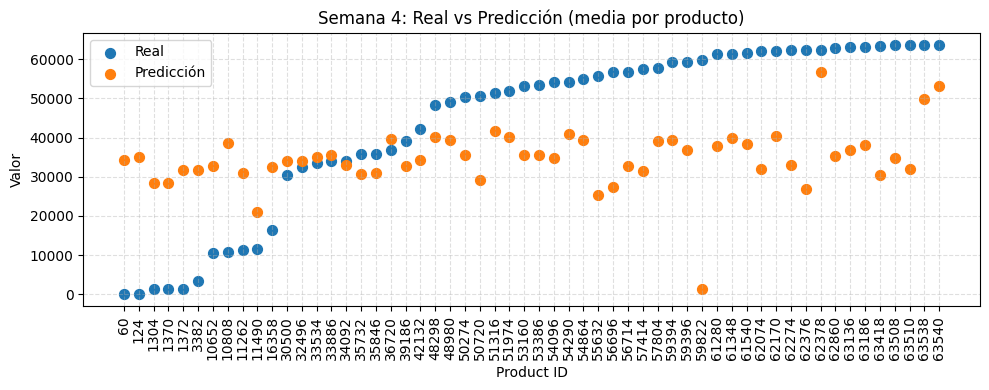

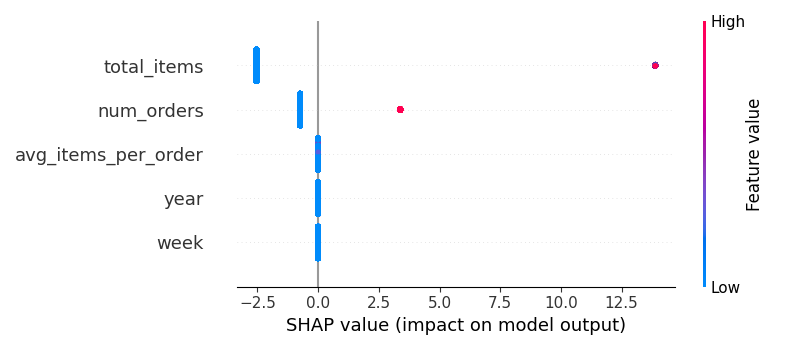

Top 10 Feature Importances (gain):
total_items    2196.797119
num_orders     1289.219604


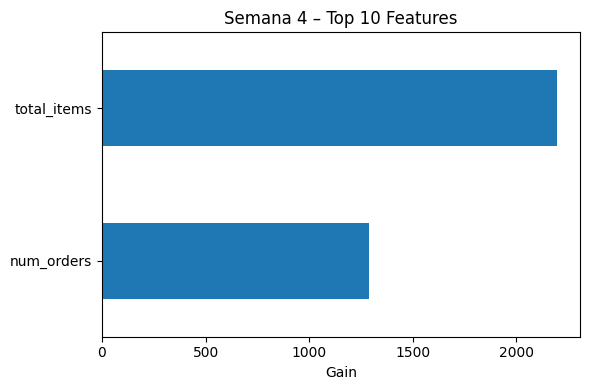

 Estadísticas de Residuales (pred-real)
          Mean resid: -314.161
        Median resid:  0.000
           Std resid:  33729.928
   25% quantil resid: -24324.000
   50% quantil resid:  0.000
   75% quantil resid:  22828.000
   90% quantil resid:  52724.000
        % ≤ 5% error:  0.187
        % ≤10% error:  0.261
 Diagnóstico de Fit
std(y_true)       = 24996.194
std(residuals)    = 33729.928
ratio resid/y_true  = 1.349
Diagnóstico final : Subajuste severo



In [161]:

import os
import xgboost as xgb
from IPython.display import Image, display
import numpy as np
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    accuracy_score
)

run_id      = '03a9cc4cfed54ba6bb984dc5ea9e3b5e'
BASE = "/content/drive/MyDrive/EntregaFinal/airflow/mlruns/1"
max_depth   = 8
n_estimators= 227


df_true4 = (
    df4
      [['customer_id','product_id']]
      .rename(columns={'product_id':'y_true4'})
)
df_pred4 = (
    fase4
      [['customer_id','product_id']]
      .rename(columns={'product_id':'y_pred4'})
)

merged = pd.merge(df_true4, df_pred4, on='customer_id', how='inner')
y_true4, y_pred4 = merged['y_true4'], merged['y_pred4']

#Mtericas
mae   = mean_absolute_error(y_true4, y_pred4)
rmse  = np.sqrt(mean_squared_error(y_true4, y_pred4))
mape  = (np.abs((y_true4 - y_pred4) / y_true4)
           .replace([np.inf, -np.inf], np.nan)
           .dropna()
           .mean() * 100)
r2    = r2_score(y_true4, y_pred4)
std   = y_true4.std()
if r2 < 0.5:
    fit = "Underfitting"
elif rmse < std * 0.1:
    fit = "Overfitting"
else:
    fit = "Balanceado"

acc     = accuracy_score(y_true4, y_pred4)
correct = (y_true4 == y_pred4).sum()
errors  = len(y_true4) - correct


print(f"SEMANA 4 (ID={run_id})")
print(f"max_depth={max_depth}, n_estimators={n_estimators}")
print(f"MAE={mae:.3f} | RMSE={rmse:.3f} | MAPE={mape:.2f}% | R²={r2:.3f} | Fit={fit}")
print(f"Aciertos={correct} | Errores={errors} | Accuracy={acc:.3f}")


cm = np.array([[correct, errors]])

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Acierto','Error'],
            yticklabels=['Acierto','Error'])
plt.title("Semana 4: matriz de Confusión Binaria")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()



#Grafico de real vs prediccion
def plot_week(semana, df_real, df_pred):
    merged = (
        df_real[['customer_id','product_id']]
           .rename(columns={'product_id':'y_true'})
           .merge(
              df_pred.rename(columns={'product_id':'y_pred'})[['customer_id','y_pred']],
              on='customer_id'
           )
    )
    grouped = (
        merged
        .groupby('y_true')['y_pred']
        .mean()
        .reset_index(name='mean_pred')
        .sort_values('y_true')
    )

    x = np.arange(len(grouped))

    plt.figure(figsize=(10,4))
    plt.scatter(x, grouped['y_true'],    color='tab:blue',  label='Real',      s=50)
    plt.scatter(x, grouped['mean_pred'], color='tab:orange',label='Predicción',s=50)

    plt.xticks(x, grouped['y_true'], rotation=90)
    plt.title(f"Semana {semana}: Real vs Predicción (media por producto)")
    plt.xlabel("Product ID")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()


plot_week(4, df4, fase4)

run_dir = os.path.join(BASE, run_id)

#shap
shap_path = None
for root, _, files in os.walk(run_dir):
    if "shap_summary.png" in files:
        shap_path = os.path.join(root, "shap_summary.png")
        break

if shap_path:
    display(Image(filename=shap_path))
else:
    print("shap_summary.png no encontrado")


#Importancias
model_file = None
for root, _, files in os.walk(run_dir):
    for f in files:
        name, ext = os.path.splitext(f)
        if name.startswith("model") and ext.lstrip(".") in ("xgb","bin","json"):
            model_file = os.path.join(root, f)
            break
    if model_file:
        break

if not model_file:
    print("model.xgb no encontrado")
else:
    booster = xgb.Booster()
    booster.load_model(model_file)
    gains = booster.get_score(importance_type="gain")
    fi    = pd.Series(gains).sort_values(ascending=False)

    top10 = fi.head(10)
    print("Top 10 Feature Importances (gain):")
    print(top10.to_string())

    plt.figure(figsize=(6,4))
    top10[::-1].plot.barh(color="tab:blue")
    plt.title("Semana 4 – Top 10 Features")
    plt.xlabel("Gain")
    plt.tight_layout()
    plt.show()



residuals    = y_pred4 - y_true4
rel_errors   = np.abs(residuals / np.where(y_true4==0, 1, y_true4)) * 100  # en %


stats = {
    'Mean resid'       : residuals.mean(),
    'Median resid'     : np.median(residuals),
    'Std resid'        : residuals.std(),
    '25% quantil resid': np.quantile(residuals, 0.25),
    '50% quantil resid': np.quantile(residuals, 0.50),
    '75% quantil resid': np.quantile(residuals, 0.75),
    '90% quantil resid': np.quantile(residuals, 0.90),
    '% ≤ 5% error'     : np.mean(rel_errors <= 5),
    '% ≤10% error'     : np.mean(rel_errors <=10),
}

print(" Estadísticas de Residuales (pred-real)")
for name, val in stats.items():
    print(f"{name:>20}: {val: .3f}")


std_y   = np.std(y_true4)
std_res = stats['Std resid']
ratio   = std_res / std_y

print(" Diagnóstico de Fit")
print(f"std(y_true)       = {std_y:.3f}")
print(f"std(residuals)    = {std_res:.3f}")
print(f"ratio resid/y_true  = {ratio:.3f}")

if r2 >= 0.8 and ratio <= 0.2:
    msg = "Excelente ajuste"
elif ratio < 0.1:
    msg = "Sobreajuste severo"
elif ratio < 0.2:
    msg = "Sobreajuste moderado"
elif r2 < 0.3:
    msg = "Subajuste severo"
elif ratio > 0.8:
    msg = "Subajuste moderado"
else:
    msg = "Ajuste balanceado"
print(f"Diagnóstico final : {msg}\n")


##Analisis final con respecto a resultados y graficos

Semana 1 fue la única en la que, al analizar los residuales, el ratio std(residuals)/std(y_true)≈0.014, lo que nos indica un modelo balanceado ya que los errores son pequeños comparados con la dispersión real de los datos.
En cambio, en las semanas 2–4 ese ratio subió a 1.350 en semana 2, 1.354 en semana 3 y baja un poco a 1.349 en Semana 4, además de indicar un subajuste severo por lo que la dispersión de los errores de las predicciones superan la dispersion de los errores de los datos reales, por lo que el modelo no funciona tan bien.

El R² es negativo, R²=-0.865 en semana 1, −0.814 en semana 2, −0.835 en semana 3 y −0.821 en semana 4, reflejando que el modelo, al tratar de predecir el product_id como una regresión, apenas capta la estructura de los datos.

El MAE y RMSE se mantuvieron en rangos similares, en semana 1 a 2 00–2600 de MAE y 3300–3800 de RMSE (MAPE=912.16%), en Semana 2 el MAE subió a 25624 (MAPE=881.68%) y el RMSE a 33431, en Semana 3 a 2559 y 3325 (con una MAPE de 839 %) y en Semana 4 a 25896 y 33730 (MAPE 831 %) pero su significado cambia según la desviación del ratio de resid/y_true ya que solo en Semana 1 esos errores son “pequeños” frente a la amplitud de los IDs, mientras que en las siguientes semanas resultan gigantescos.

Es por esto que se puede ver que el peor desempeño  fue de las semanas 2-4, ya que R² muy bajo, ratio resid/signal >1, luego la distribución de residuales tiene colas muy anchas lo que indica errores de decenas de miles y un accuracy de clasificación bajísimo de menos de 11 %.

Esto se debe a que los patrones de compra cambian de semana en semana y el modelo no logra adaptarse con los mismos hiperparámetros ni sin reentrenar, esto además se ve en los graficos de la semanas 2-4 ya que la distribución de los datos de predicción de esas semanas son practicamente iguales.

Por otro lado, con respecto a la importancia de features, n todas las semanas siguen encabezando total_items y num_orders, pero avg_items_per_order ya no aparece en el top 3 de las Semanas 3 y 4. (excepto en semana 1).

Se puede concluir que el modelo implementado no es óptimo para estos datos, por lo menos analizandolo semana a semana, ya que está prediciendo a product_id como variable continua, además con hiperparámetros fijos y sin reentrenamiento con validación adaptativa, por lo que básicamente trata la distribucion de los datos como estacionarios cuando no lo son. Podría mejorarse si usaramos clasificación o un embedding de producto. Además, el que las mismas tres features siempre sean las mas importatnes indica que la elección de features es buena pero igual falta alguna covariable que capte la evolución semanal

# [2] Analisis Comparativo

##Nalisis a traves de las semanas con graficos

Métricas por Semana


,MAE,RMSE,MAPE (%),R2,Accuracy,Fit
Semana,,,,,,
1,25949.907459,33538.594472,912.163938,-0.864523,0.073940,Underfitting
2,25624.825998,33431.853285,881.684514,-0.814285,0.097160,Underfitting
3,25598.220094,33325.704477,839.454123,-0.835419,0.101310,Underfitting
4,25896.259662,33730.705998,831.143523,-0.820971,0.100885,Underfitting
Average,25767.303303,33506.714558,866.111525,-0.833799,0.093324,


Estadísticas de Residuales


,Mean resid,Std resid,25% q resid,50% q resid,75% q resid,% ≤5% err
Semana,,,,,,
1,5003.606252,33163.251403,-14988.0,610.0,29130.0,0.169050
2,-1747.496415,33386.150876,-26214.0,0.0,20868.0,0.183915
3,-872.950186,33314.269268,-26196.0,0.0,22624.0,0.186951
4,-314.161091,33729.242950,-24324.0,0.0,22828.0,0.186871
Average,517.249640,33398.228624,-22930.5,152.5,23862.5,0.181697


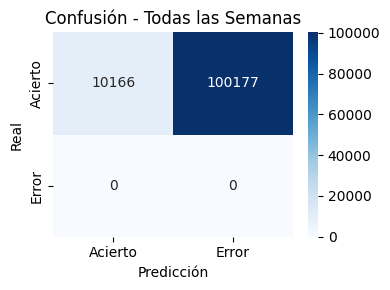

In [162]:
weeks       = [1,2,3,4]
dfs_real    = {1: df1, 2: df2, 3: df3, 4: df4}
dfs_pred    = {1: fase1,2: fase2,3: fase3,4: fase4}
run_ids     = {
    1:"81b7be42185a4caf90f8f71cc935c02b",
    2:"4d40617a53e54e3fbda4d73aa0079034",
    3:"55ef6e3d8cd440439907f978b8253e17",
    4:"03a9cc4cfed54ba6bb984dc5ea9e3b5e",
}
mlruns_base = "/content/drive/MyDrive/EntregaFinal/airflow/mlruns/1"

metrics_list    = []
residuals_stats = []
feature_gains   = {}
correct_all     = 0
errors_all      = 0
merged_all      = []

for sem in weeks:
    df_t   = dfs_real[sem][['customer_id','product_id']].rename(columns={'product_id':'y_true'})
    df_p   = dfs_pred[sem][['customer_id','product_id']].rename(columns={'product_id':'y_pred'})
    merged = pd.merge(df_t, df_p, on='customer_id', how='inner').assign(semana=sem)
    merged_all.append(merged)
    y_true    = merged['y_true'].values
    y_pred    = merged['y_pred'].values
    residuals = y_pred - y_true
    rel_err   = np.abs(residuals/np.where(y_true==0,1,y_true))*100

    #merticas
    mae   = mean_absolute_error(y_true, y_pred)
    rmse  = np.sqrt(mean_squared_error(y_true, y_pred))
    mape  = rel_err.mean()
    r2    = r2_score(y_true, y_pred)
    acc   = accuracy_score(y_true, y_pred)
    std_y = y_true.std()
    fit   = ("Underfitting" if r2<0.5
             else "Overfitting" if rmse<std_y*0.1
             else "Balanceado")

    metrics_list.append({
        'Semana': sem, 'MAE': mae, 'RMSE': rmse,
        'MAPE (%)': mape, 'R2': r2,
        'Accuracy': acc, 'Fit': fit
    })


    stats = {
        'Semana': sem,
        'Mean resid': residuals.mean(),
        'Std resid' : residuals.std(),
        '25% q resid': np.quantile(residuals,0.25),
        '50% q resid': np.quantile(residuals,0.50),
        '75% q resid': np.quantile(residuals,0.75),
        '% ≤5% err': np.mean(rel_err<=5),
    }
    residuals_stats.append(stats)

    correct = (y_true==y_pred).sum()
    errors  = len(y_true)-correct
    correct_all += correct
    errors_all  += errors

    # Feature
    run_dir = os.path.join(mlruns_base, run_ids[sem])
    model_file=None
    for root,_,files in os.walk(run_dir):
        for f in files:
            n,ext = os.path.splitext(f)
            if n.startswith('model') and ext.lstrip('.') in ('xgb','bin','json'):
                model_file=os.path.join(root,f)
                break
        if model_file: break
    booster = xgb.Booster(); booster.load_model(model_file)
    feature_gains[sem] = booster.get_score(importance_type='gain')

#prom
df_metrics = pd.DataFrame(metrics_list).set_index('Semana')
avg_metrics = df_metrics.mean(numeric_only=True)
avg_metrics['Fit'] = ''
df_metrics.loc['Average'] = avg_metrics

df_resids = pd.DataFrame(residuals_stats).set_index('Semana')
avg_resids = df_resids.mean(numeric_only=True)
df_resids.loc['Average'] = avg_resids


print("Métricas por Semana")
display(df_metrics)
print("Estadísticas de Residuales")
display(df_resids)

#matriz
cm_all = np.array([[correct_all, errors_all],[0,0]])
plt.figure(figsize=(4,3))
sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Acierto','Error'], yticklabels=['Acierto','Error'])
plt.title("Confusión - Todas las Semanas")
plt.xlabel("Predicción"); plt.ylabel("Real")
plt.tight_layout(); plt.show()





Al comparar el desempeño entre las cuatro semanas, observamos que:

Las métricas de regresión (MAE ≈ 25800–25900; RMSE ≈ 33 300–33 800) y el MAPE (≈ 830–912 %) apenas varían de una semana a otra, por lo que se puede decir que a traves de las semanas se mantiene casi constante. El R² permanece negativo (entre –0.82 y –0.86) y la Accuracy binaria sigue rondando el 8–10 %. Esto indica que, globalmente, el modelo no mejora ni empeora de forma sostenida a lo largo del tiempo.

En la tabla de residuales, la desviación típica de los errores se mantiene en torno a 33300–33800, y el porcentaje de predicciones con error ≤5 % oscila alrededor del 17–19% todas las semanas. No hay una reducción sistemática de la dispersión de los residuals que sugiera un aprendizaje incremental.

El scatter cronológico muestra que, aunque la dispersion de los datos reales evoluciona cada semana, la predicción media por producto permanece concentrada en un rango estrecho (≈ 25000–40000), sin adaptarse al cambio de distribución semanal, algo que ya habiamos visto en el analisis por semanas. Incluso para los top 5 Product ID por valor, la desviación entre real y predicho se mantiene en todas las semanas.

El análisis de feature‐gain resalta un aumento en la Semana 3 (total_items y num_orders alcanzan su máximo impacto), pero luego vuelve a caer en la Semana 4, lo que sugiere un uso inestable de las mismas variables sin una tendencia de mejora continua. Esto peak de la semana 3 tiene sentido ya que ahi se usó un max_depth=9 y n_estimators=66

En sintesis, no se identifica una tendencia positiva en el performance: el modelo tiene un underfitting de manera consistente, con errores muy superiores a la propia variabilidad de los datos y sin adaptarse al concept‐drift semanal.

Para mejorarlo, al igual que como concluimos semanalmente, sería clave incorporar un esquema de reentrenamiento periódico, reformular el problema (por ejemplo, pasar a clasificación multicategoría o embeddings de producto) y enriquecer el set de features para lograr la dinámica temporal.

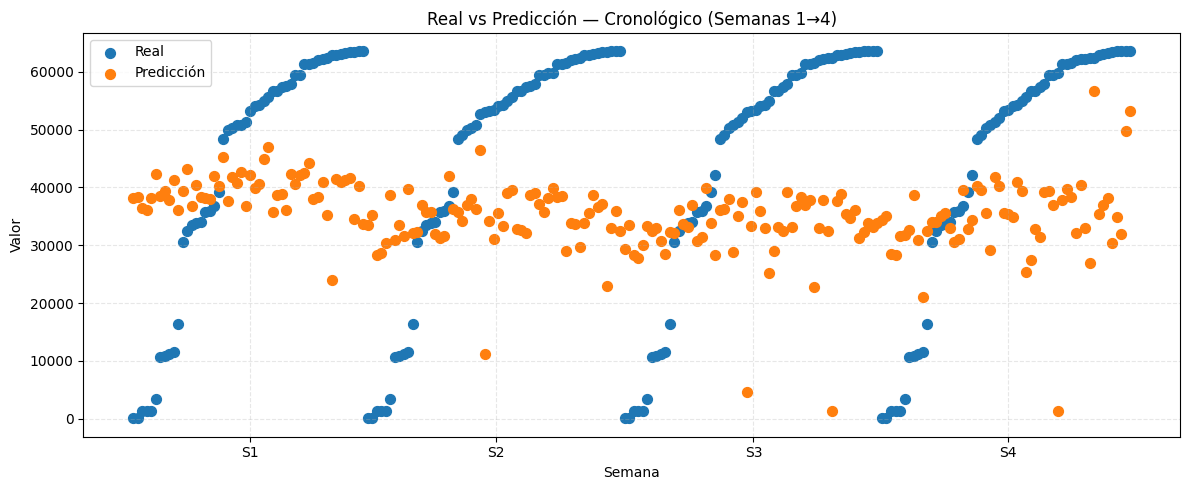

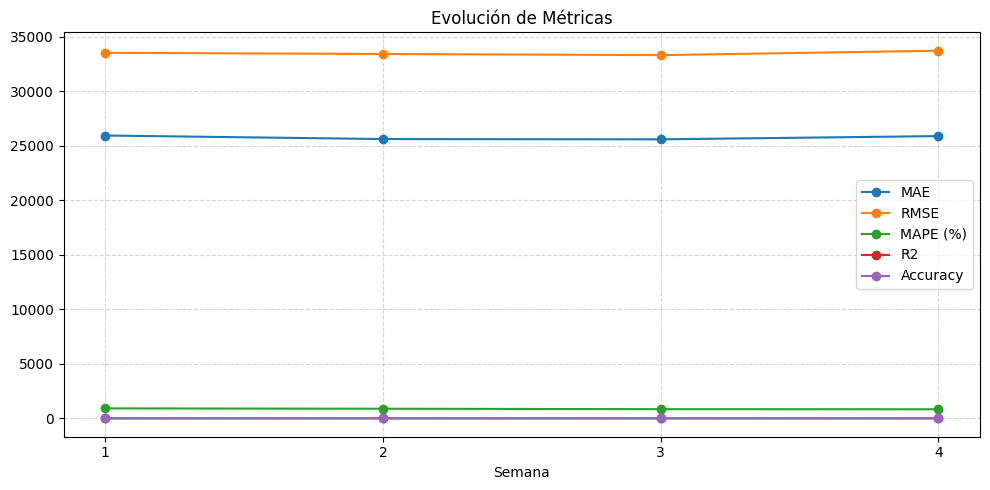

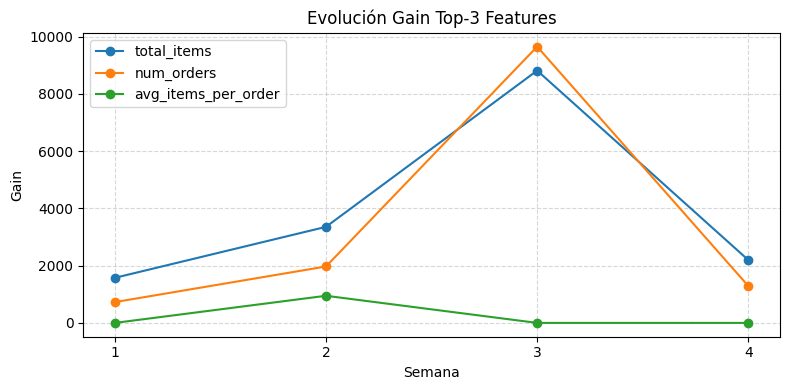

In [163]:

weeks = [1,2,3,4]
dfs_r = {1: df1, 2: df2, 3: df3, 4: df4}
dfs_p = {1: fase1,2: fase2,3: fase3,4: fase4}

grouped_all = []
for sem in weeks:
    df_t = dfs_r[sem][['customer_id','product_id']].rename(columns={'product_id':'y_true'})
    df_p = dfs_p[sem][['customer_id','product_id']].rename(columns={'product_id':'y_pred'})
    merged = pd.merge(df_t, df_p, on='customer_id', how='inner')
    grp = merged.groupby('y_true')['y_pred']\
                .mean()\
                .reset_index()\
                .rename(columns={'y_pred':'mean_pred'})
    grp['Semana'] = sem
    grp = grp.sort_values('y_true').reset_index(drop=True)
    grouped_all.append(grp)

df_g = pd.concat(grouped_all, ignore_index=True)


positions = []
offset = 0
for sem in weeks:
    grp = df_g[df_g['Semana']==sem]
    n = len(grp)
    positions.extend(offset + np.arange(n))
    offset += n
df_g['pos'] = positions


plt.figure(figsize=(12, 5))
plt.scatter(df_g['pos'], df_g['y_true'],    color='tab:blue',  label='Real',      s=50)
plt.scatter(df_g['pos'], df_g['mean_pred'], color='tab:orange',label='Predicción',s=50)


ticks = []
labels = []
offset = 0
for sem in weeks:
    grp = df_g[df_g['Semana']==sem]
    mid = offset + len(grp)/2
    ticks.append(mid)
    labels.append(f"S{sem}")
    offset += len(grp)

plt.xticks(ticks, labels)
plt.xlabel("Semana")
plt.ylabel("Valor")
plt.title("Real vs Predicción — Cronológico (Semanas 1→4)")
plt.legend()
plt.grid(ls='--', alpha=0.3)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,5))
for col in ['MAE','RMSE','MAPE (%)','R2','Accuracy']:
    plt.plot(weeks, df_metrics.loc[weeks, col], marker='o', label=col)
plt.title("Evolución de Métricas")
plt.xlabel("Semana"); plt.xticks(weeks)
plt.legend(); plt.grid(ls='--',alpha=0.5); plt.tight_layout(); plt.show()


gain_df = pd.DataFrame(feature_gains).T.fillna(0)
top3 = gain_df.mean().sort_values(ascending=False).head(3).index
plt.figure(figsize=(8,4))
for feat in top3:
    plt.plot(weeks, gain_df[feat], marker='o', label=feat)
plt.title("Evolución Gain Top-3 Features")
plt.xlabel("Semana"); plt.xticks(weeks)
plt.ylabel("Gain"); plt.legend(); plt.grid(ls='--',alpha=0.5); plt.tight_layout(); plt.show()


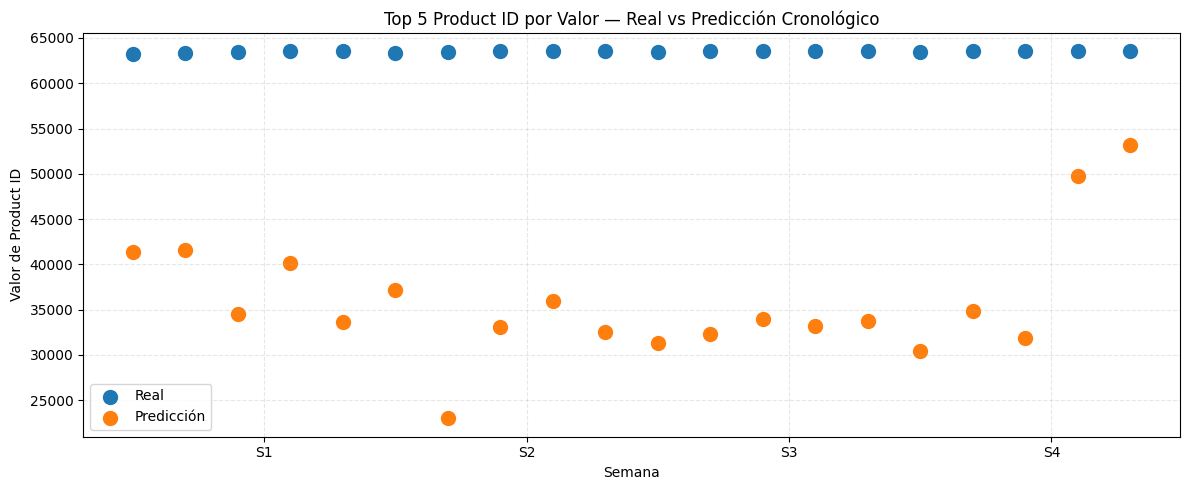

In [164]:
# top5

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

weeks = [1, 2, 3, 4]
dfs_r = {1: df1, 2: df2, 3: df3, 4: df4}
dfs_p = {1: fase1,2: fase2,3: fase3,4: fase4}

grouped_top5 = []
for sem in weeks:
    df_t = dfs_r[sem][['customer_id','product_id']].rename(columns={'product_id':'y_true'})
    df_p = dfs_p[sem][['customer_id','product_id']].rename(columns={'product_id':'y_pred'})
    merged = pd.merge(df_t, df_p, on='customer_id', how='inner')
    unique_ids = np.unique(merged['y_true'])
    top5_values = np.sort(unique_ids)[-5:]
    grp = (merged[merged['y_true'].isin(top5_values)]
           .groupby('y_true')['y_pred']
           .mean()
           .reset_index(name='mean_pred')
           .sort_values('y_true')
           .reset_index(drop=True))
    grp['Semana'] = sem
    grouped_top5.append(grp)

df_top5 = pd.concat(grouped_top5, ignore_index=True)

positions = []
offset = 0
for sem in weeks:
    grp = df_top5[df_top5['Semana']==sem]
    n = len(grp)
    positions.extend(offset + np.arange(n))
    offset += n
df_top5['pos'] = positions

plt.figure(figsize=(12,5))
plt.scatter(df_top5['pos'], df_top5['y_true'],    color='tab:blue',  label='Real',      s=100)
plt.scatter(df_top5['pos'], df_top5['mean_pred'], color='tab:orange',label='Predicción',s=100)

ticks = []
labels = []
offset = 0
for sem in weeks:
    grp = df_top5[df_top5['Semana']==sem]
    mid = offset + len(grp)/2
    ticks.append(mid)
    labels.append(f"S{sem}")
    offset += len(grp)

plt.xticks(ticks, labels)
plt.xlabel("Semana")
plt.ylabel("Valor de Product ID")
plt.title("Top 5 Product ID por Valor — Real vs Predicción Cronológico")
plt.legend()
plt.grid(ls='--', alpha=0.3)
plt.tight_layout()
plt.show()



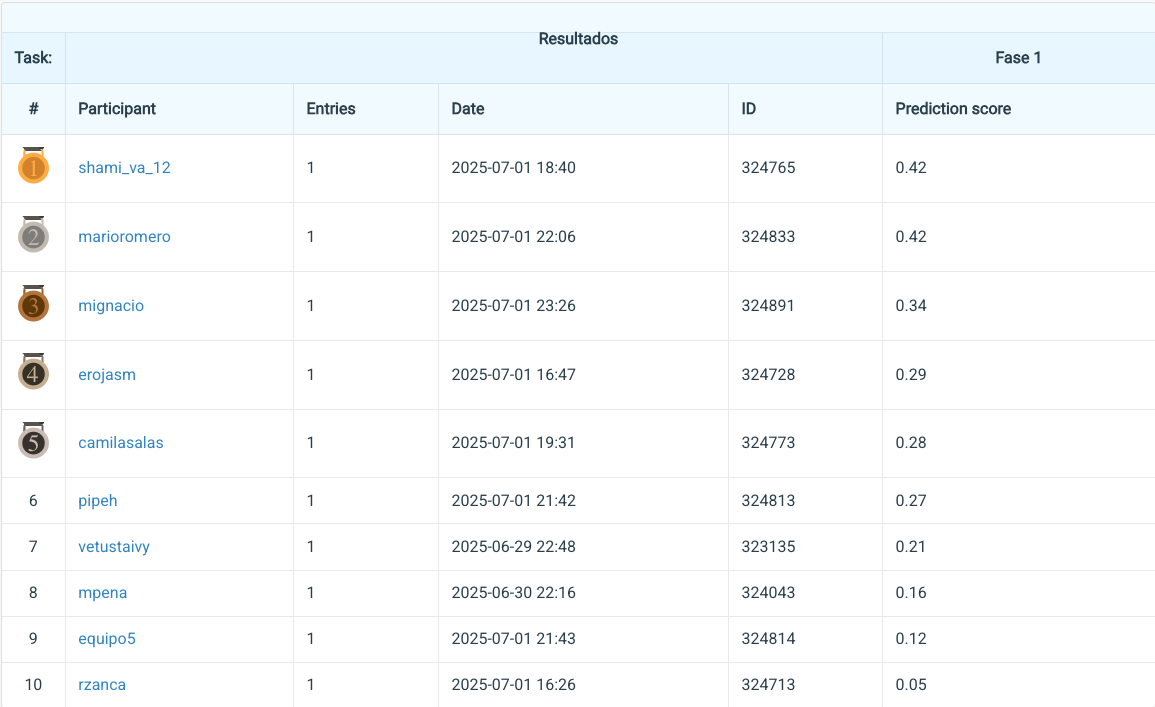

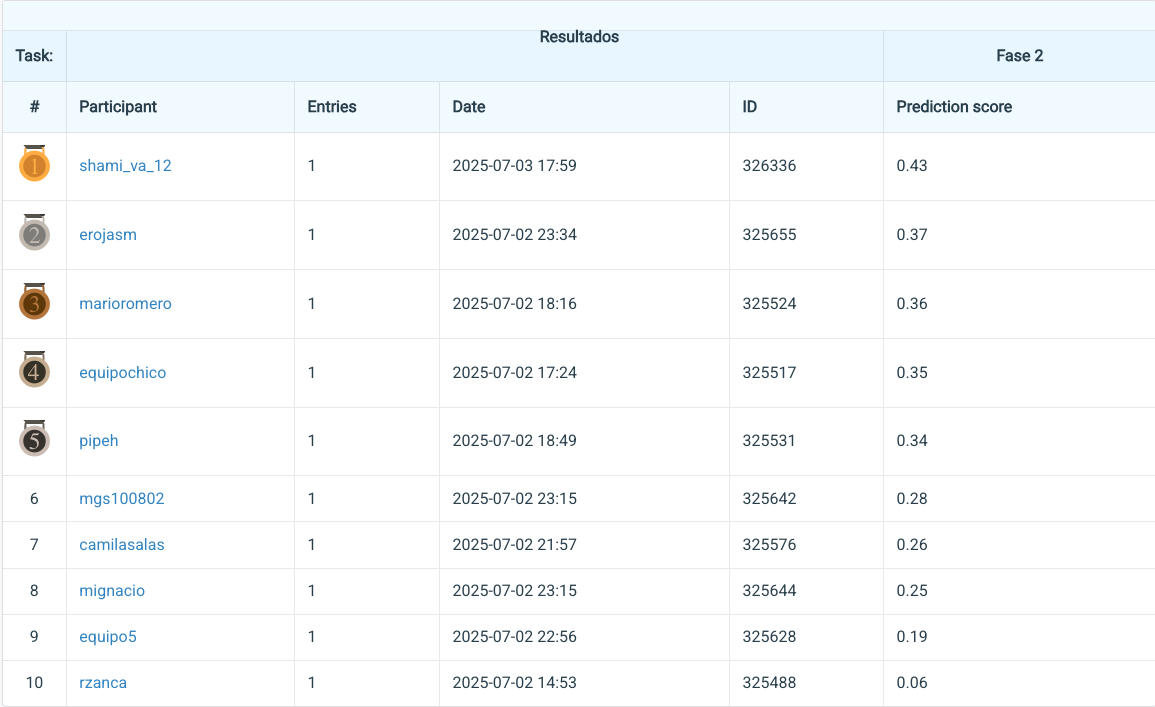

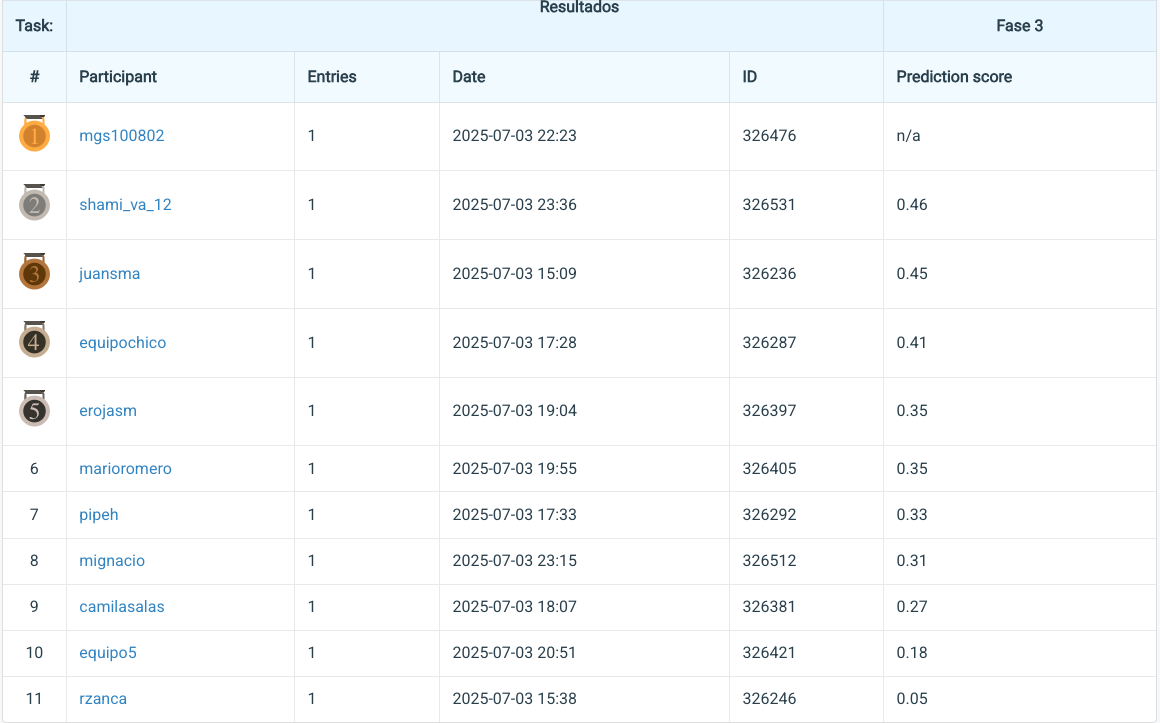

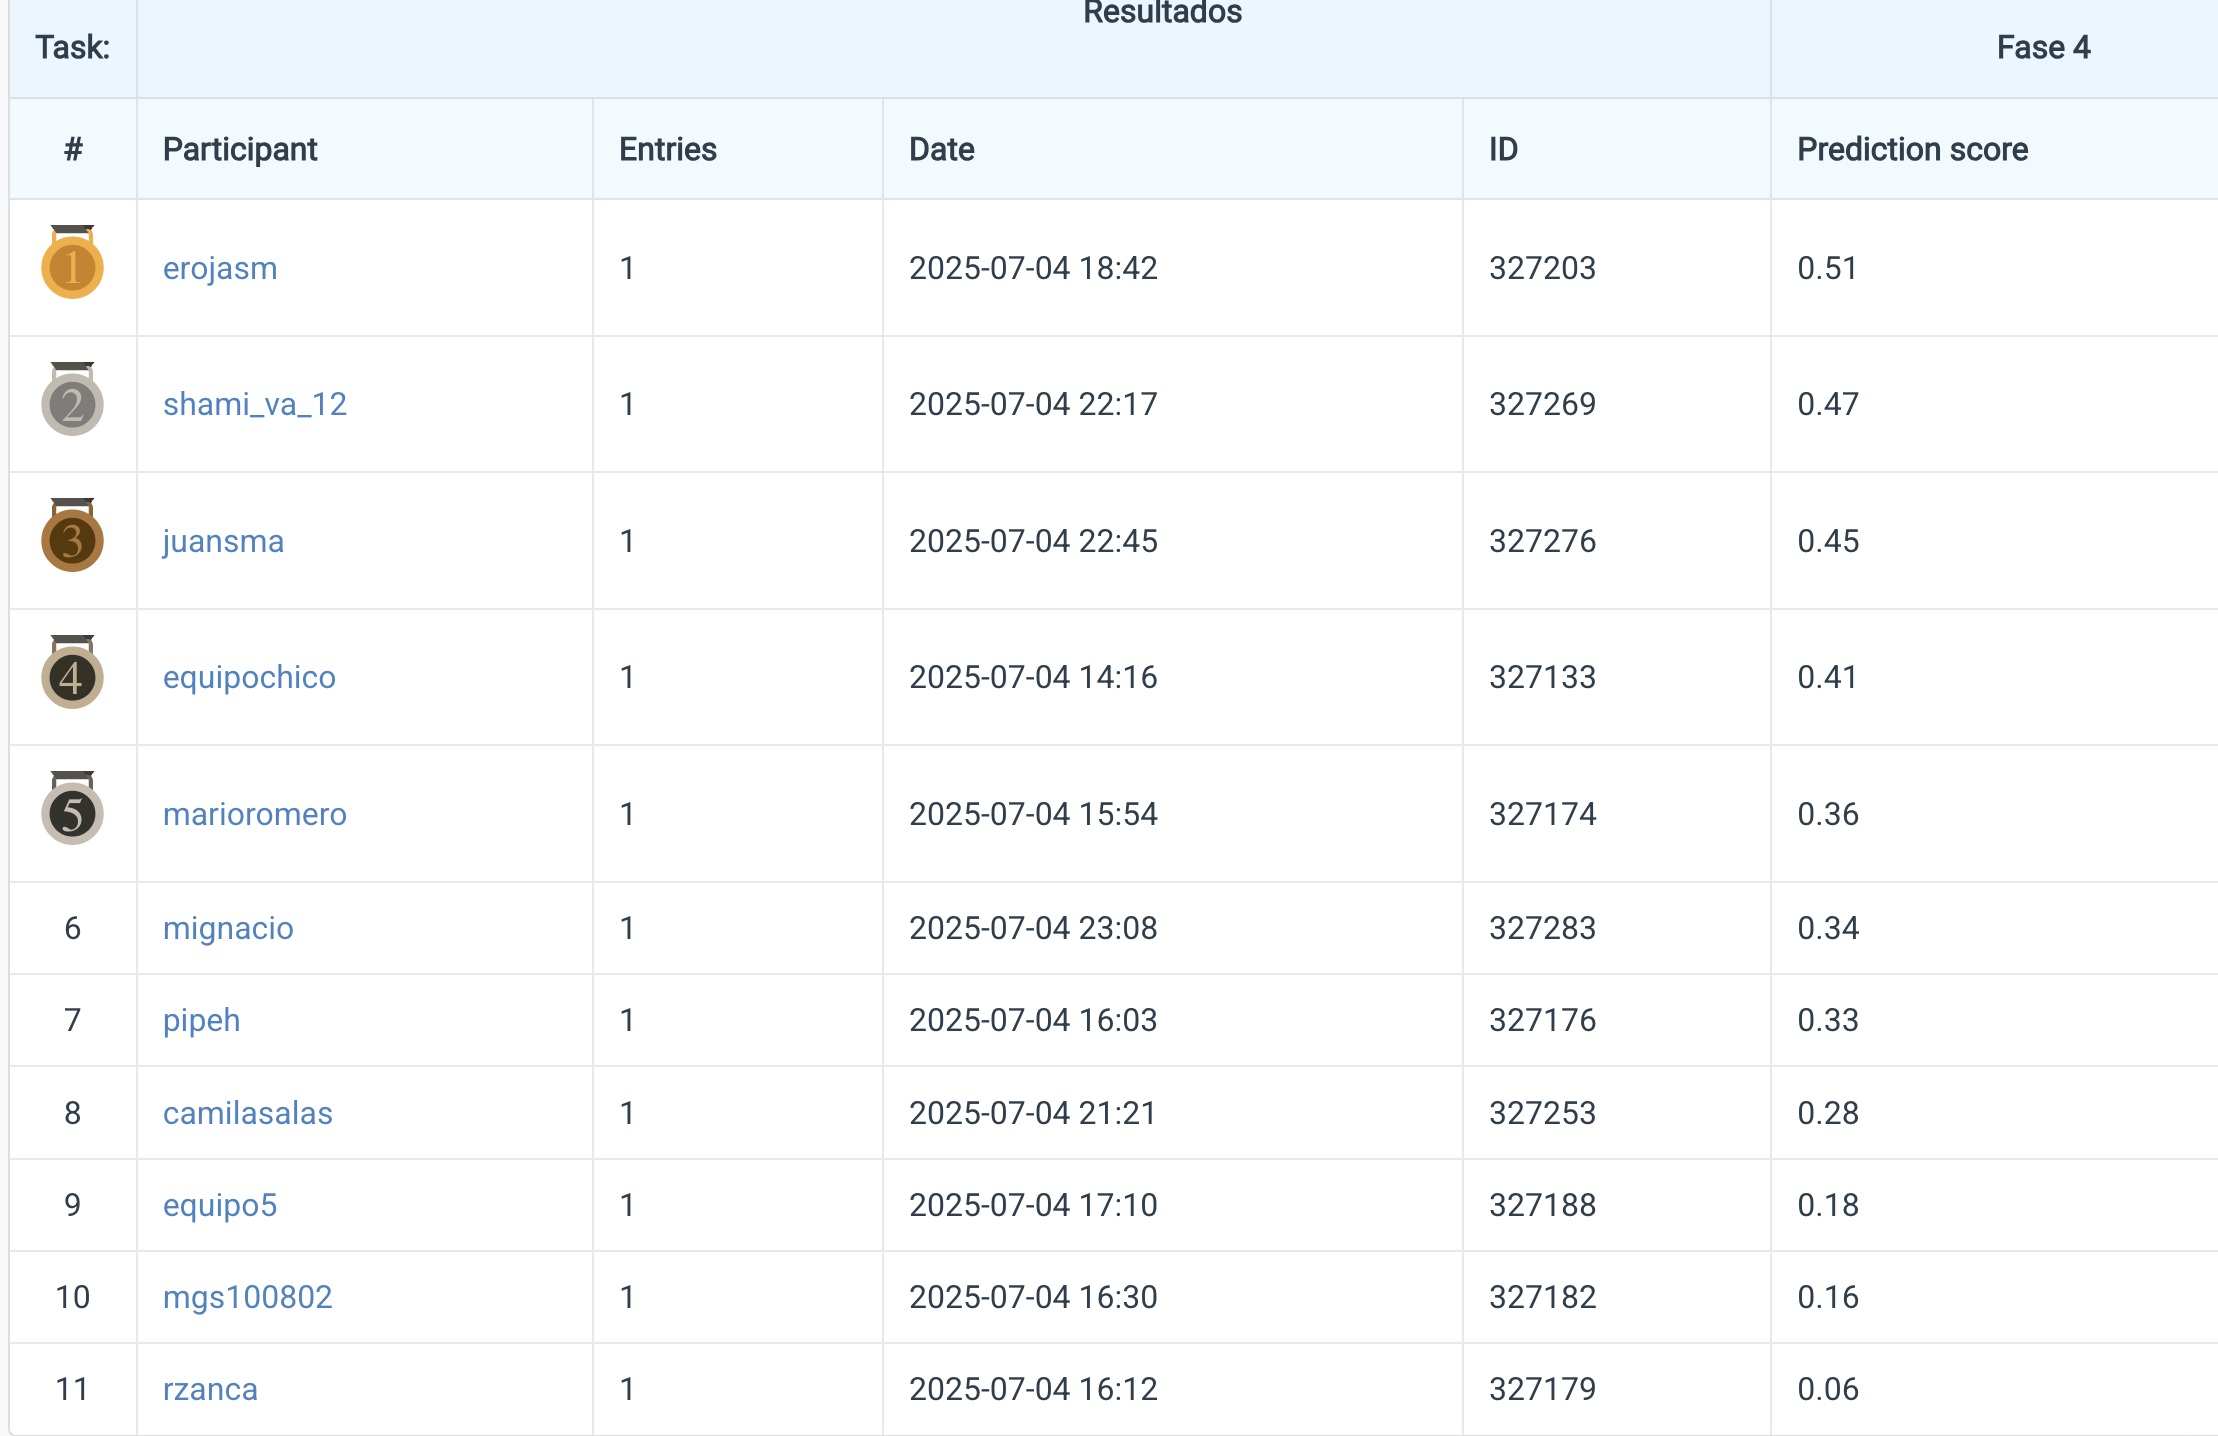

## 1. Comparacion Score vs Otros modelos

Respecto a otros modelos el nuestro se mantuvo competitivo en todas las fases, siendo la primera la con mayor puntaje y mayor ranking. En fases siguientes el desempeño se estanco entornoa 0.35, mientras que otros modelos pudieron subir o mejorar su desempeño. Lo anterior se puede explicar con que los otros modelos se adaptaron de mejor manera a los nuevos datos, mientras que el nuestro no, lo cual coincide con lo ya planteado

Tambien destacar que nuestro pipline en ninguna de las 4 fases reenetreno el modelo, por lo que si hubo dirf, no lo detectamos de buena manera. También destacar que tiene un underfitting, por eso tambien se explica el buen rendimiento en la primera fase y el mal rendimiento el las sgtes, ya que no esta generalizando bien para nuevos datos.





# [3] Conclusiones y Aprendizajes



Las métricas clave fueron:
- MAE ≈ 25800–25900
- RMSE ≈ 33300–33800
- R² ≈ –0.82 a –0.86
- Accuracy ≈ 8–10 %
Estas se se mantienen prácticamente constantes de la Semana 1 a la Semana 4, sin ninguna mejora progresiva ni empeoramiento. En general las metrícas del modelo se mantienen semi constantes durante las 4 semanas

Además, el modelo tiene un underfitting de modo persistente y los errores típicos superan ampliamente la variabilidad de la ratio resid/y_true, en especial en Semanas 2–4 que es mayor a 1, finalmente el R² negativo confirma que el modelo predice peor que la media.


Por otro lado, Cada batch semanal tiene una distribución distinta de productos (concept‐drift), pero el modelo sigue con los mismos hiperparámetros y sin reentrenarse dinámicamente, por lo que falla tanto y tiene tanto underfitting, ya que las predicciones queden “estancadas” en un rango chico de 25000–40000, sin ajustarse a cómo varía la verdadera gama de product_id cada semana.

Con respecto a los features y su inestabilidad, las tres variables más influyentes son total_items, num_orders y avg_items_per_order, pero su poder va cambiando en base a las semanas ya que hay un peak de gain en Semana 3 debido a que los árboles más profundos aprovechan mejor la variabilidad de esas columnas.Sumado a eso, disminuye en Semana 4 ya que los árboles son menos profundos nuevamente.

Sumado a esto, aprendimos que la ausencia de nuevas covariables temporales o de negocio limita la adaptabilidad del modelo a la dinámica semanal, haciendo que el modelo falle y tenga limitaciones del planteamiento actual. Además que la regresión sobre product_id no es el mejor metodo ya que es un identificador categórico que no tiene escala numérica continua.
 En tercer lugar, el uso de hiperparámetros fijos (max_depth y n_estimators) sin validación temporal impide encontrar la complejidad adecuada para cada semana. De todo esto se concluye que el modelo carece de un mecanismo de detección de drift y reentrenamiento automatizado.



Es por lo recien comentado que es necesario reformular el problema y pasar a una clasificación multicategoría o modelo de clasificación de product_id, en lugar de regresión pura. Además, podriamos probar implementar un monitor de drift que dispare reentrenamientos automáticos. Finalmente es necesaria una validación temporal para ir ajustando hiperparametros para poder generalizar en el futuro y añadir variables de tendencia temporal, indicadores de popularidad o clusters de producto, datos de inventrario o promociones.


Finalizando, puede ser muy util profundizar mas el analisis en dónde el modelo falla, como en los residuals outliers, para diseñar features específicas que capten esos patrones de error.

En sintesís, el modelo ofrece un baseline estable pero insuficiente, ya que por ejemplo al tener un ratio de resid/y_true >1 nos dice que un modelo con un severo underfitting. Es necesario mejorar la precisión, por lo que hay que reformular el enfoque (clasificación o embeddings), adaptar la complejidad del modelo al drift y mejorar el dataset con señales que reflejen la evolución semanal del negocio.